# Introduction





## Reading In Pickled DataFrames

Our first step is to import the dataframes we are going to merge in this notebook.

In [20]:
import pandas as pd


df = pd.read_pickle('merged_df_mentalhealthde2023-08-04 18:53:36.pickle')

df_stock=pd.read_pickle('df_stocks.pkl')





In [19]:
print(df.head(100))

    const         Entity Code  Year    Schizo      Depp     Alch    YEAR  \
0     1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
1     1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
2     1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
3     1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
4     1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
..    ...            ...  ...   ...       ...       ...      ...     ...   
95    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
96    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
97    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
98    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
99    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   

    AGE_NUM  ESTIMATE  
0       0.0      12.5  
1       0.0      21.5  
2       0.0    

In [14]:
print(df.head())

   const         Entity Code  Year    Schizo      Depp     Alch    YEAR  \
0    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
1    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
2    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
3    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   
4    1.0  United States  USA  1990  0.467115  4.068695  3.11136  1990.0   

   AGE_NUM  ESTIMATE  
0      0.0      12.5  
1      0.0      21.5  
2      0.0       4.8  
3      0.0      22.8  
4      0.0      12.8  


In [3]:
#print(df_stock.describe())

print(len(df_stock))
print(df_stock.head())

42
  Ticker  Year  Average Close
0   AAPL  2010       9.280088
1   AAPL  2011      13.000154
2   AAPL  2012      20.573204
3   AAPL  2013      16.879817
4   AAPL  2014      23.066164


Merge the DataFrames along year. 

In [24]:
merged_df = df.merge(df_stock, left_on='YEAR', right_on='Year', how='inner')

#2023-08-04 20:15:51 

print(merged_df.head())

merged_df.columns

   const         Entity Code  Year_x    Schizo      Depp      Alch    YEAR  \
0    1.0  United States  USA    2010  0.504039  4.932534  2.559565  2010.0   
1    1.0  United States  USA    2010  0.504039  4.932534  2.559565  2010.0   
2    1.0  United States  USA    2010  0.504039  4.932534  2.559565  2010.0   
3    1.0  United States  USA    2011  0.501304  4.914326  2.556059  2011.0   
4    1.0  United States  USA    2011  0.501304  4.914326  2.556059  2011.0   

   AGE_NUM   ESTIMATE Ticker  Year_y  Average Close  
0  2.68642  12.807097   AAPL    2010       9.280088  
1  2.68642  12.807097   MSFT    2010      27.058571  
2  2.68642  12.807097   NVDA    2010       3.390794  
3  2.68642  12.600637   AAPL    2011      13.000154  
4  2.68642  12.600637   MSFT    2011      26.052341  


Index(['const', 'Entity', 'Code', 'Year_x', 'Schizo', 'Depp', 'Alch', 'YEAR',
       'AGE_NUM', 'ESTIMATE', 'Ticker', 'Year_y', 'Average Close'],
      dtype='object')

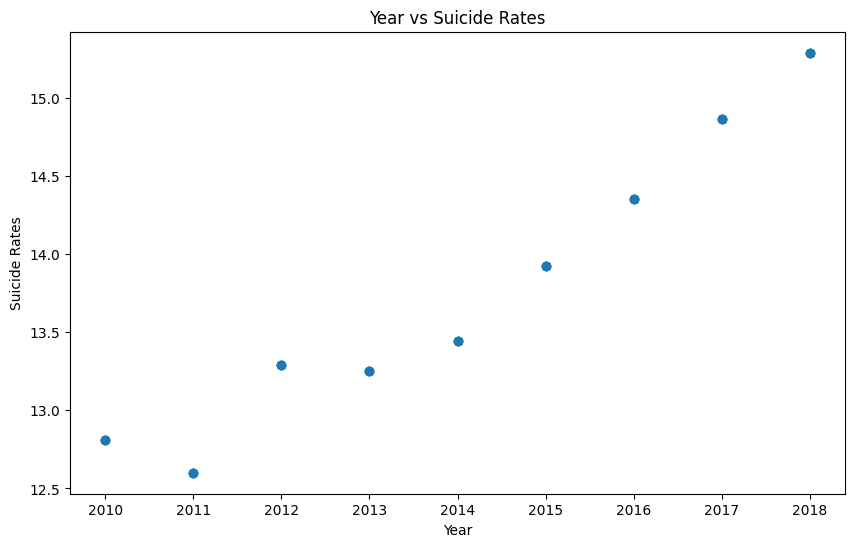

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Year_x'], merged_df['ESTIMATE'])
plt.title('Year vs Suicide Rates')
plt.xlabel('Year')
plt.ylabel('Suicide Rates')
plt.show()

In [23]:
def create_sub_dfs(df, column):
    unique_values = df[column].unique()
    dfs = {}
    for value in unique_values:
        dfs[value] = df[df[column] == value]
    return dfs

# Usage:
sub_dfs = create_sub_dfs(merged_df, 'Ticker')

print(sub_dfs)


{'AAPL':     const         Entity Code  Year_x    Schizo      Depp      Alch    YEAR  \
0     1.0  United States  USA    2010  0.504039  4.932534  2.559565  2010.0   
3     1.0  United States  USA    2011  0.501304  4.914326  2.556059  2011.0   
6     1.0  United States  USA    2012  0.496241  4.873906  2.549004  2012.0   
9     1.0  United States  USA    2013  0.490129  4.825310  2.539524  2013.0   
12    1.0  United States  USA    2014  0.484211  4.780310  2.528673  2014.0   
15    1.0  United States  USA    2015  0.479682  4.751602  2.517357  2015.0   
18    1.0  United States  USA    2016  0.473109  4.740377  2.500322  2016.0   
21    1.0  United States  USA    2017  0.467995  4.735252  2.484274  2017.0   
24    1.0  United States  USA    2018  0.467770  4.732570  2.481960  2018.0   

     AGE_NUM   ESTIMATE Ticker  Year_y  Average Close  
0   2.686420  12.807097   AAPL    2010       9.280088  
3   2.686420  12.600637   AAPL    2011      13.000154  
6   2.686420  13.290850   AAPL  

In [17]:
type(sub_dfs)

sub_dfs.keys()

apple_df=sub_dfs['AAPL']

type(apple_df)

apple_df.head(6000)

,const,Entity,Code,Year_x,Schizo,Depp,Alch,YEAR,AGE_NUM,ESTIMATE,Ticker,Year_y,Average Close
0,1.0,United States,USA,2010,0.504039,4.932534,2.559565,2010.0,0.0,12.1,AAPL,2010,9.280088
3,1.0,United States,USA,2010,0.504039,4.932534,2.559565,2010.0,0.0,19.8,AAPL,2010,9.280088
6,1.0,United States,USA,2010,0.504039,4.932534,2.559565,2010.0,0.0,5.0,AAPL,2010,9.280088
9,1.0,United States,USA,2010,0.504039,4.932534,2.559565,2010.0,0.0,22.0,AAPL,2010,9.280088
12,1.0,United States,USA,2010,0.504039,4.932534,2.559565,2010.0,0.0,9.1,AAPL,2010,9.280088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,1.0,United States,USA,2018,0.467770,4.732570,2.481960,2018.0,5.0,1.3,AAPL,2018,47.263357
4704,1.0,United States,USA,2018,0.467770,4.732570,2.481960,2018.0,2.0,4.1,AAPL,2018,47.263357
4707,1.0,United States,USA,2018,0.467770,4.732570,2.481960,2018.0,3.0,4.4,AAPL,2018,47.263357
4710,1.0,United States,USA,2018,0.467770,4.732570,2.481960,2018.0,4.0,3.2,AAPL,2018,47.263357
